In [1]:
# Import packages
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import torch

In [2]:
# Load the relative_errors dictionary from file
with open('results/NPv3.pkl', 'rb') as f:
    data = pickle.load(f)


# Problem constants
Lmax, mu, ell = data["Lmax"], data["mu"], data["ell"]

# Condition number of the problem
print(r'ell = {}'.format(ell))
print(r'mu = {}'.format(mu))
print(r'Lmax = {}'.format(Lmax))
print(r'Condition Number = {}'.format(ell/mu))


# Compute mean and standard deviation of relative errors
relative_errors = data["relative_errors"]

# Prepare data for plotting
local_steps = list(relative_errors.keys())
mean_errors = []
std_errors = []

for n_local_step in local_steps:
    errors = relative_errors[n_local_step]
    errors = [trial_error.tolist() for trial_error in errors]
    mean_errors.append(np.mean(errors, axis=0))  # Mean error across trials
    std_errors.append(np.std(errors, axis=0))    # Standard deviation across trials

# Convert to numpy arrays for plotting
mean_errors = np.array(mean_errors)
std_errors = np.array(std_errors)

ell = 562.0816040039062
mu = 0.4472821354866028
Lmax = 0.5667914748191833
Condition Number = 1256.6600341796875


/var/folders/gy/14_v6tv14gz17t09_6vmdr4c0000gn/T/ipykernel_26825/3182165432.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(local_steps))


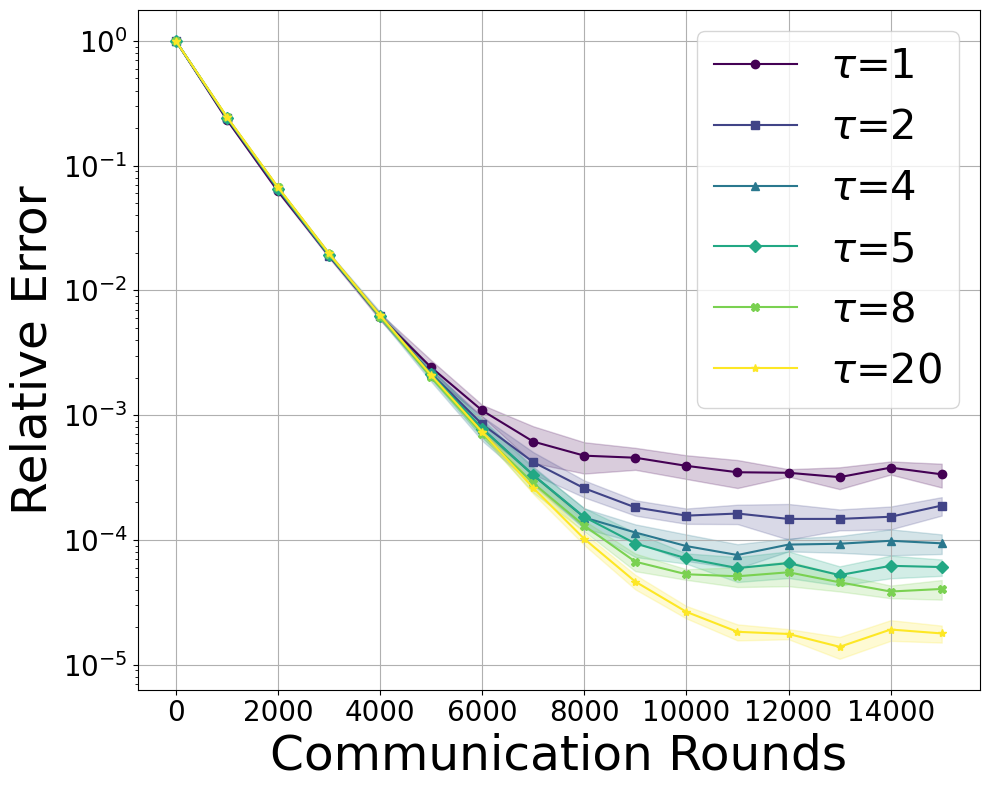

In [4]:
# Create a color map
cmap = cm.get_cmap('viridis', len(local_steps))
markers = ['o', 's', '^', 'D', 'X', '*']  # Six different markers

# Define the markers to use (indices)
# markers_on = np.arange(0, len(mean_errors[0]), len(mean_errors[0])/10).astype(int)
markers_on = np.arange(0, 15001, 1000).astype(int)

# Plotting
plt.figure(figsize=(10, 8))

for i, n_local_step in enumerate(local_steps):
    color = cmap(i)  # Get color from colormap

    # Plot the mean error for the specified markers
    plt.plot(markers_on, mean_errors[i][markers_on], marker= markers[i], label=r'$\tau$={}'.format(n_local_step), color=color)

    # Create shaded region for mean ± std with transparency
    plt.fill_between(
        markers_on, 
        (mean_errors[i] - std_errors[i])[markers_on], 
        (mean_errors[i] + std_errors[i])[markers_on], 
        alpha=0.2, color=color  # Adjust alpha for transparency
    )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Communication Rounds', fontsize = 35)
plt.ylabel('Relative Error', fontsize = 35)
plt.yscale('log')
plt.legend(fontsize = 30)
plt.grid(True)

# Save the figure
plt.tight_layout()
plt.savefig('plots/NPv3.pdf', format = 'pdf', bbox_inches = 'tight')

plt.show()